# Explore Read Counts

In [9]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs
from larval_gonad.config import memory
from larval_gonad.scRNAseq import CLUSTER_ANNOT, CLUSTER_ORDER

# Setup notebook
nbconfig = Nb.setup_notebook('2018-05-07_explore_counts', seurat_dir='../output/combined_testis_force/')

last updated: 2018-05-07 
Git hash: 1a7ba88a88a0ff24c9397783dc6ab1c3ea3c808b


In [97]:
clusters = nbconfig.seurat.get_clusters()['res.0.4']
clusters.name = 'cluster'

In [7]:
raw = nbconfig.seurat.get_raw()

In [108]:
raw.head()

cell_id,rep1_AAACCTGAGACAAGCC,rep1_AAACCTGAGCTTATCG,rep1_AAACCTGGTGTAATGA,rep1_AAACCTGGTTCATGGT,rep1_AAACCTGTCCCTCTTT,rep1_AAACGGGAGACTGGGT,rep1_AAACGGGCACAGTCGC,rep1_AAACGGGGTCGCGTGT,rep1_AAACGGGGTGTTAAGA,rep1_AAACGGGTCGTCCAGG,...,rep3_TTTGCGCCATCCGTGG,rep3_TTTGGTTTCAGCATGT,rep3_TTTGGTTTCGTGGACC,rep3_TTTGTCAAGACTAGAT,rep3_TTTGTCAAGCCAGTTT,rep3_TTTGTCAAGGTGACCA,rep3_TTTGTCACACTTGGAT,rep3_TTTGTCAGTCATGCAT,rep3_TTTGTCATCTCTGTCG,rep3_TTTGTCATCTGCGTAA
FBgn,,,,,,,,,,,,,,,,,,,,,
FBgn0031081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
FBgn0031085,0,0,0,2,0,0,0,0,0,0,...,0,4,0,1,0,0,0,8,0,0
FBgn0040784,0,0,0,3,0,0,0,0,0,0,...,0,3,0,2,0,1,0,2,0,0
FBgn0031086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0031082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
rawT = raw.T

In [111]:
rawT['rep'] = np.array(rawT.index.str.split('_').tolist())[:, 0]
vals = rawT.join(clusters).groupby(['cluster', 'rep']).sum()

In [112]:
vals.head()

FBgn0031081  FBgn0031085  FBgn0040784  FBgn0031086  FBgn0031082  \
cluster rep                                                                     
0       rep1            1          469          185            0           95   
        rep2            0         1166          273            0          196   
        rep3            0         1173          275            0          197   
1       rep1            4            9           10            0            2   
        rep2            4          183           71            0           39   

              FBgn0031080  FBgn0053217  FBgn0052350  FBgn0024733  FBgn0040372  \
cluster rep                                                                     
0       rep1            0           19            0          449           14   
        rep2            1           29            8          896           27   
        rep3            1           29            8          893           26   
1       rep1           36           74           21         7951           63   
        rep2            6           71           18        12492           65   

                 ...       FBgn0045498  FBgn0001174  FBgn0053128  FBgn0051926  \
cluster rep      ...                                                            
0       rep1     ...                 0            0            0            0   
        rep2     ...                 0            0            0            1   
        rep3     ...                 0            0            0            1   
1       rep1     ...                 0            0            0            0   
        rep2     ...                 0            0            0            1   

              FBgn0051661  FBgn0028481  FBgn0031306  FBgn0031305  FBgn0031276  \
cluster rep                                                                     
0       rep1            0            0            0            0            0   
        rep2            0            1            1            0            1   
        rep3            0            1            1            0            1   
1       rep1            0            0            0            0            0   
        rep2            0            0            0            1            1   

              FBgn0040725  
cluster rep                
0       rep1            0  
        rep2            2  
        rep3            2  
1       rep1            0  
        rep2            0  

[5 rows x 14312 columns]

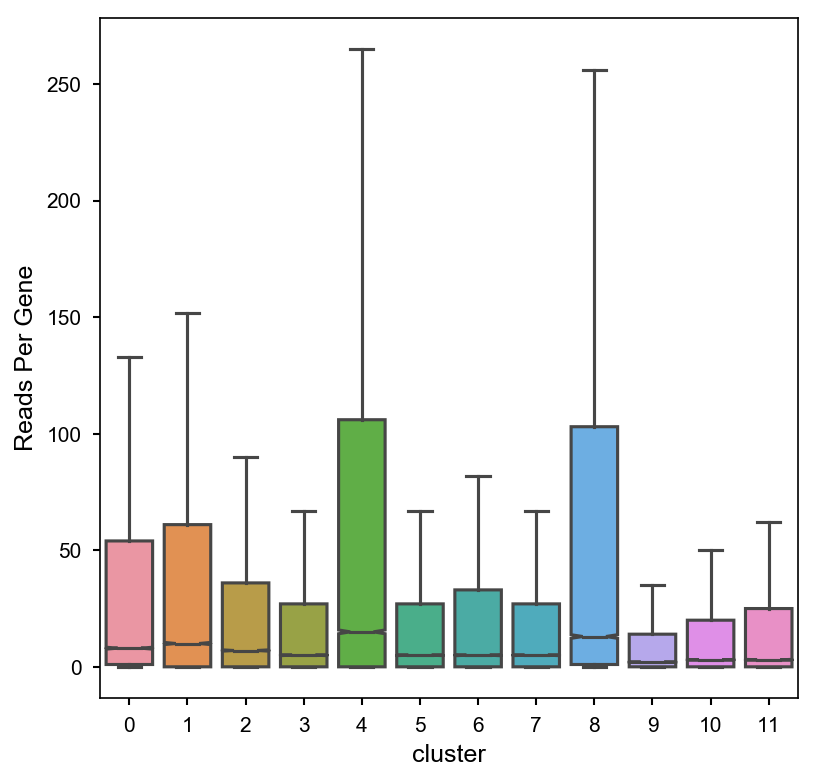

In [124]:
sns.boxplot(x='cluster', y='Reads Per Gene', data=vals.reset_index().melt(id_vars=['cluster', 'rep'], value_name='Reads Per Gene'), showfliers=False, notch=True)

In [141]:
x_only = nbconfig.fbgn2chrom.query('chrom == "chrY"').index.tolist()

Text(0.5,1,'Expression of Y Linked Genes')

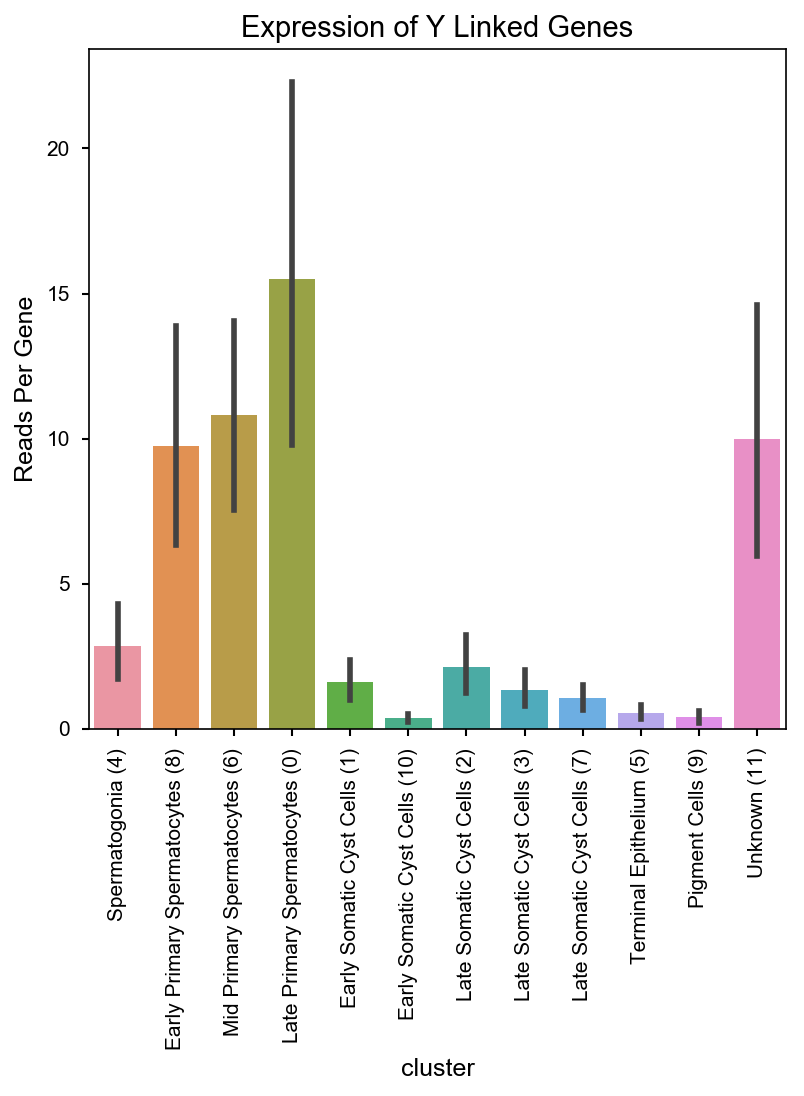

In [166]:
_dat = vals.reset_index().melt(id_vars=['cluster', 'rep'], value_name='Reads Per Gene').query(f'variable in {x_only}')
_dat['cluster'] = _dat.cluster.replace(CLUSTER_ANNOT)
ax = sns.barplot(x='cluster', y='Reads Per Gene', data=_dat, order=CLUSTER_ORDER)

for l in ax.get_xticklabels():
    l.set_rotation(90)

ax.set_title('Expression of Y Linked Genes')

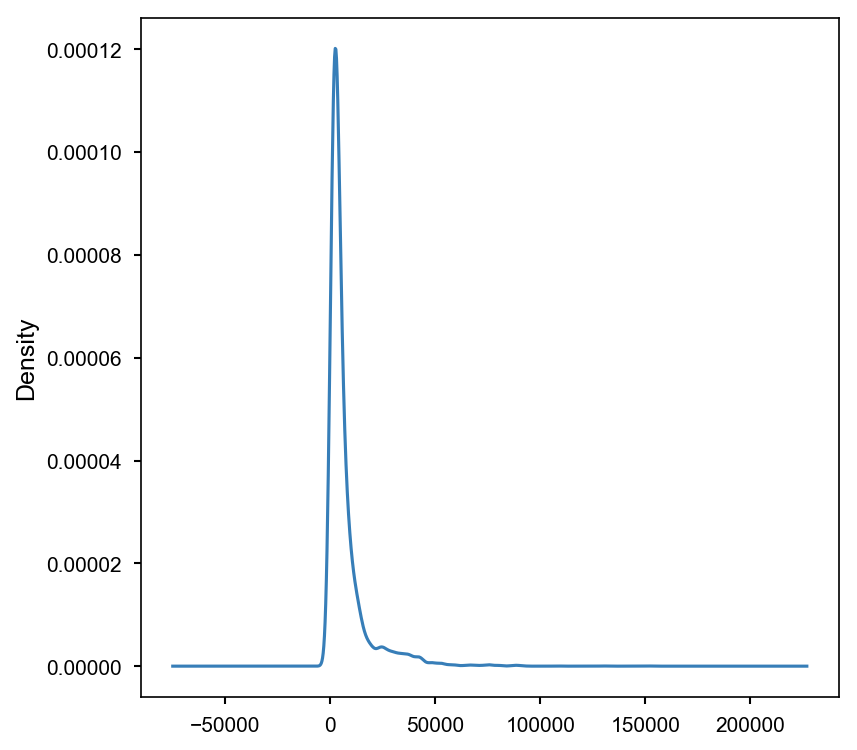

In [10]:
raw.sum().plot(kind='kde')

In [12]:
raw.sum().describe()

count      8066.000000
mean       6972.599430
std       10140.129759
min         514.000000
25%        2160.000000
50%        3520.500000
75%        7347.000000
max      151481.000000
dtype: float64

In [17]:
raw.loc[:, [x.startswith('rep1') for x in raw.columns]].sum().describe()

count      2804.000000
mean       4528.896933
std       10339.361600
min         514.000000
25%         697.000000
50%        1183.500000
75%        3371.750000
max      151481.000000
dtype: float64

In [18]:
raw.loc[:, [x.startswith('rep2') for x in raw.columns]].sum().describe()

count     2631.000000
mean      8274.792854
std       9788.120999
min       2078.000000
25%       2908.500000
50%       4564.000000
75%       8951.500000
max      89051.000000
dtype: float64

In [19]:
raw.loc[:, [x.startswith('rep3') for x in raw.columns]].sum().describe()

count     2631.000000
mean      8274.792854
std       9788.120999
min       2078.000000
25%       2908.500000
50%       4564.000000
75%       8951.500000
max      89051.000000
dtype: float64

In [25]:
from larval_gonad.cell_selection import cellranger_counts, cellranger_umi

In [27]:
cnts = cellranger_umi('../output/testis2_force/outs/molecule_info.h5')

In [28]:
cnts.head()

,cell_id,read_cnt,umi
0,24674393,0,869905
1,24674393,1,281520
2,24674393,1,1015759
3,24674393,2,285123
4,24674393,1,163023


In [29]:
bob = cnts.groupby('cell_id').size()

In [33]:
clusters[clusters == 11]

rep1_CGATGGCAGCCTATGT    11
rep1_GCTGCGATCTCGTTTA    11
rep1_GTCACGGAGACATAAC    11
rep2_AACTCAGGTAAGTAGT    11
rep2_AACTCTTAGAAACGAG    11
rep2_AACTTTCAGAAACCAT    11
rep2_ACCCACTCATCCGGGT    11
rep2_AGAGCGACAGACACTT    11
rep2_AGCTCCTGTTAAGTAG    11
rep2_ATCGAGTCATGTAGTC    11
rep2_CAGAGAGCATGATCCA    11
rep2_CAGCTGGCATGCGCAC    11
rep2_CATCGGGCAGCGTCCA    11
rep2_CGACTTCAGCTACCTA    11
rep2_CGTGTAAAGGTGATAT    11
rep2_CTAGTGATCTGCAAGT    11
rep2_CTCGAGGGTGCACGAA    11
rep2_CTCGTCAGTCTAGAGG    11
rep2_GAACGGAAGGTGTTAA    11
rep2_GAGCAGAAGTTAAGTG    11
rep2_GCAATCATCGTCTGAA    11
rep2_GCACTCTAGAGCTGCA    11
rep2_GGCCGATTCGGTGTTA    11
rep2_GGTGTTATCGGAAACG    11
rep2_GTAACGTAGGGTGTGT    11
rep2_TACCTTACAGAAGCAC    11
rep2_TACGGGCGTGCACCAC    11
rep2_TCGGTAAGTTGGTGGA    11
rep2_TGCTACCTCAGCTTAG    11
rep3_AACTCAGGTAAGTAGT    11
rep3_AACTCTTAGAAACGAG    11
rep3_AACTTTCAGAAACCAT    11
rep3_ACCCACTCATCCGGGT    11
rep3_AGAGCGACAGACACTT    11
rep3_AGCTCCTGTTAAGTAG    11
rep3_ATCGAGTCATGTAGT

In [98]:
bob = clusters.to_frame()

In [99]:
bob

,cluster
rep1_AAACCTGAGACAAGCC,0
rep1_AAACCTGAGCTTATCG,2
rep1_AAACCTGGTGTAATGA,1
rep1_AAACCTGGTTCATGGT,0
rep1_AAACCTGTCCCTCTTT,2
rep1_AAACGGGAGACTGGGT,7
rep1_AAACGGGCACAGTCGC,6
rep1_AAACGGGGTCGCGTGT,0
rep1_AAACGGGGTGTTAAGA,10
rep1_AAACGGGTCGTCCAGG,3


In [100]:
bob['rep'] = np.array(bob.index.str.split('_').tolist())[:, 0]

In [102]:
_bob = bob.groupby('cluster')['rep'].value_counts()

In [103]:
_bob.name = 'Number of Cells'

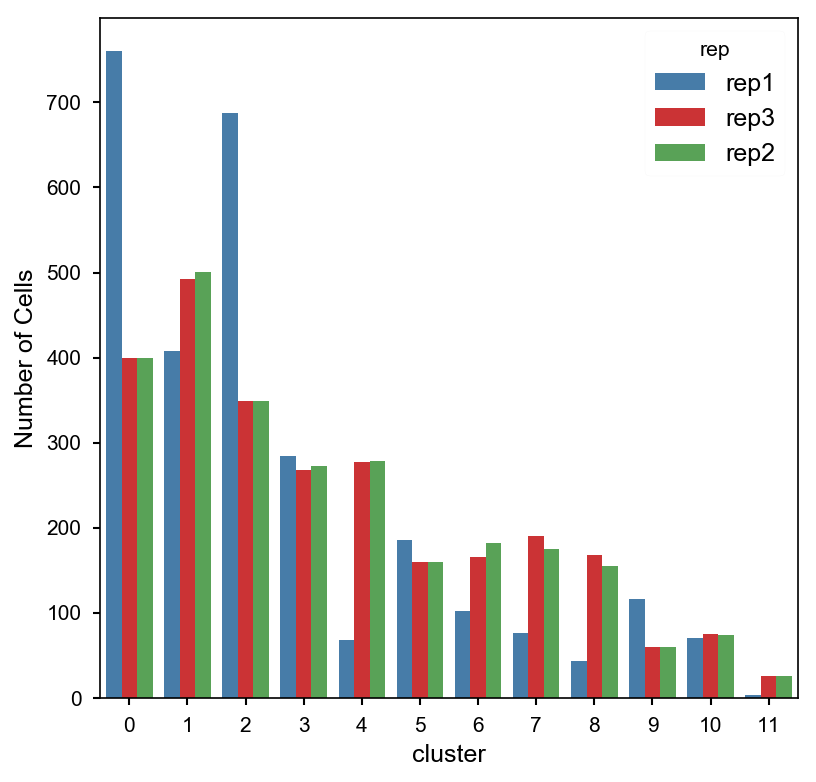

In [104]:
sns.barplot(x='cluster', y='Number of Cells', data=_bob.to_frame().reset_index(), hue='rep')